# Exercises

### Our scenario continues:
*As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.*

In [1]:
# prepare enviornment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle
import split_scale

import features

In [40]:
#df = wrangle.wrangle_telco()

In [41]:
csv = pd.read_csv('~/GoogleDrive/Codeup/bayes-methodologies-exercises/cars.csv')

In [39]:
print(csv.info())
csv.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
Name                406 non-null object
Miles_per_Gallon    398 non-null float64
Cylinders           406 non-null int64
Displacement        406 non-null float64
Horsepower          400 non-null float64
Weight_in_lbs       406 non-null int64
Acceleration        406 non-null float64
Year                406 non-null object
Origin              406 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 28.6+ KB
None


,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,1970-01-01,USA
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,1970-01-01,USA
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,1970-01-01,USA
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,1970-01-01,USA
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,1970-01-01,USA


In [86]:
df = (csv[['Miles_per_Gallon','Cylinders','Displacement','Horsepower','Weight_in_lbs','Acceleration']]
      .dropna()
      .rename(columns={'Miles_per_Gallon': 'mpg','Cylinders': 'cyl','Displacement': 'displ','Horsepower': 'hp','Weight_in_lbs': 'lbs','Acceleration':'accltn'})
     )
df['dpc'] = df.displ / df.cyl
df['hppc'] = df.hp / df.cyl
df['dplb'] = df.displ / df.lbs
df['hpplb'] = df.hp / df.lbs
df['dphp'] = df.displ / df.hp
df = df.drop(columns={'cyl'})

In [87]:
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 10 columns):
mpg       392 non-null float64
displ     392 non-null float64
hp        392 non-null float64
lbs       392 non-null int64
accltn    392 non-null float64
dpc       392 non-null float64
hppc      392 non-null float64
dplb      392 non-null float64
hpplb     392 non-null float64
dphp      392 non-null float64
dtypes: float64(9), int64(1)
memory usage: 33.7 KB
None


,mpg,displ,hp,lbs,accltn,dpc,hppc,dplb,hpplb,dphp
0,18.0,307.0,130.0,3504,12.0,38.375,16.250,0.087614,0.037100,2.361538
1,15.0,350.0,165.0,3693,11.5,43.750,20.625,0.094774,0.044679,2.121212
2,18.0,318.0,150.0,3436,11.0,39.750,18.750,0.092549,0.043655,2.120000
3,16.0,304.0,150.0,3433,12.0,38.000,18.750,0.088552,0.043694,2.026667
4,17.0,302.0,140.0,3449,10.5,37.750,17.500,0.087562,0.040591,2.157143
5,15.0,429.0,198.0,4341,10.0,53.625,24.750,0.098825,0.045612,2.166667
6,14.0,454.0,220.0,4354,9.0,56.750,27.500,0.104272,0.050528,2.063636
7,14.0,440.0,215.0,4312,8.5,55.000,26.875,0.102041,0.049861,2.046512
8,14.0,455.0,225.0,4425,10.0,56.875,28.125,0.102825,0.050847,2.022222
9,15.0,390.0,190.0,3850,8.5,48.750,23.750,0.101299,0.049351,2.052632


In [107]:
X_train, X_test, y_train, y_test = split_scale.split_my_data(df, 'mpg', train_pct=.8, random_state=123)

In [109]:
print(X_train.info())
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 6 to 378
Data columns (total 9 columns):
displ     313 non-null float64
hp        313 non-null float64
lbs       313 non-null int64
accltn    313 non-null float64
dpc       313 non-null float64
hppc      313 non-null float64
dplb      313 non-null float64
hpplb     313 non-null float64
dphp      313 non-null float64
dtypes: float64(8), int64(1)
memory usage: 24.5 KB
None


,displ,hp,lbs,accltn,dpc,hppc,dplb,hpplb,dphp
6,454.0,220.0,4354,9.0,56.75,27.50,0.104272,0.050528,2.063636
301,86.0,65.0,1975,15.2,21.50,16.25,0.043544,0.032911,1.323077
129,121.0,110.0,2660,14.0,30.25,27.50,0.045489,0.041353,1.100000
179,90.0,71.0,2223,16.5,22.50,17.75,0.040486,0.031939,1.267606
115,97.0,88.0,2279,19.0,24.25,22.00,0.042563,0.038613,1.102273


In [110]:
print(X_test.info())
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 229 to 198
Data columns (total 9 columns):
displ     79 non-null float64
hp        79 non-null float64
lbs       79 non-null int64
accltn    79 non-null float64
dpc       79 non-null float64
hppc      79 non-null float64
dplb      79 non-null float64
hpplb     79 non-null float64
dphp      79 non-null float64
dtypes: float64(8), int64(1)
memory usage: 6.2 KB
None


,displ,hp,lbs,accltn,dpc,hppc,dplb,hpplb,dphp
229,260.0,110.0,4060,19.0,32.50,13.75,0.064039,0.027094,2.363636
254,85.0,70.0,2070,18.6,21.25,17.50,0.041063,0.033816,1.214286
143,302.0,140.0,4141,14.0,37.75,17.50,0.072929,0.033808,2.157143
156,120.0,97.0,2489,15.0,30.00,24.25,0.048212,0.038971,1.237113
404,120.0,79.0,2625,18.6,30.00,19.75,0.045714,0.030095,1.518987


In [111]:
print(y_train.info())
y_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 6 to 378
Data columns (total 1 columns):
mpg    313 non-null float64
dtypes: float64(1)
memory usage: 4.9 KB
None


,mpg
6,14.0
301,34.1
129,24.0
179,25.0
115,20.0


In [112]:
print(y_test.info())
y_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 229 to 198
Data columns (total 1 columns):
mpg    79 non-null float64
dtypes: float64(1)
memory usage: 1.2 KB
None


,mpg
229,17.0
254,39.4
143,16.0
156,24.0
404,28.0


### Scaled X y tables

In [108]:
X_scalar, X_train_scaled, X_test_scaled = split_scale.min_max_scaler(X_train, X_test)
y_scaler, y_train_scaled, y_test_scaled = split_scale.min_max_scaler(y_train, y_test)

In [113]:
print(X_train_scaled.info())
X_train_scaled.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 6 to 378
Data columns (total 9 columns):
displ     313 non-null float64
hp        313 non-null float64
lbs       313 non-null float64
accltn    313 non-null float64
dpc       313 non-null float64
hppc      313 non-null float64
dplb      313 non-null float64
hpplb     313 non-null float64
dphp      313 non-null float64
dtypes: float64(9)
memory usage: 24.5 KB
None


,displ,hp,lbs,accltn,dpc,hppc,dplb,hpplb,dphp
6,0.997416,0.945652,0.777148,0.030675,0.996865,0.639344,0.958994,0.902574,0.491893
301,0.046512,0.103261,0.102637,0.411043,0.112853,0.196721,0.186064,0.372053,0.224757
129,0.136951,0.347826,0.296853,0.337423,0.332288,0.639344,0.210812,0.626278,0.144289
179,0.056848,0.135870,0.172952,0.490798,0.137931,0.255738,0.147136,0.342764,0.204748
115,0.074935,0.228261,0.188829,0.644172,0.181818,0.422951,0.173568,0.543766,0.145108


In [114]:
print(X_test_scaled.info())
X_test_scaled.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 229 to 198
Data columns (total 9 columns):
displ     79 non-null float64
hp        79 non-null float64
lbs       79 non-null float64
accltn    79 non-null float64
dpc       79 non-null float64
hppc      79 non-null float64
dplb      79 non-null float64
hpplb     79 non-null float64
dphp      79 non-null float64
dtypes: float64(9)
memory usage: 6.2 KB
None


,displ,hp,lbs,accltn,dpc,hppc,dplb,hpplb,dphp
229,0.496124,0.347826,0.693791,0.644172,0.388715,0.098361,0.446922,0.196853,0.600109
254,0.043928,0.130435,0.129572,0.619632,0.106583,0.245902,0.154480,0.399307,0.185514
143,0.604651,0.510870,0.716756,0.337423,0.520376,0.245902,0.560070,0.399061,0.525623
156,0.134367,0.277174,0.248370,0.398773,0.326019,0.511475,0.245475,0.554549,0.193748
404,0.134367,0.179348,0.286929,0.619632,0.326019,0.334426,0.213683,0.287246,0.295426


In [115]:
print(y_train_scaled.info())
y_train_scaled.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 6 to 378
Data columns (total 1 columns):
mpg    313 non-null float64
dtypes: float64(1)
memory usage: 4.9 KB
None


,mpg
6,0.132979
301,0.667553
129,0.398936
179,0.425532
115,0.292553


In [116]:
print(y_test_scaled.info())
y_test_scaled.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 229 to 198
Data columns (total 1 columns):
mpg    79 non-null float64
dtypes: float64(1)
memory usage: 1.2 KB
None


,mpg
229,0.212766
254,0.808511
143,0.186170
156,0.398936
404,0.505319


In [122]:
df_scaled = X_test_scaled.join(y_test_scaled)

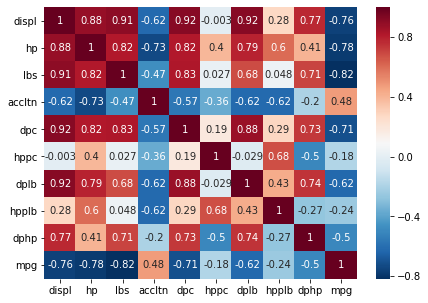

In [123]:
#Using Pearson Correlation
plt.figure(figsize=(7,5))
cor = df_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdBu_r)
plt.show()

<Figure size 720x576 with 0 Axes>

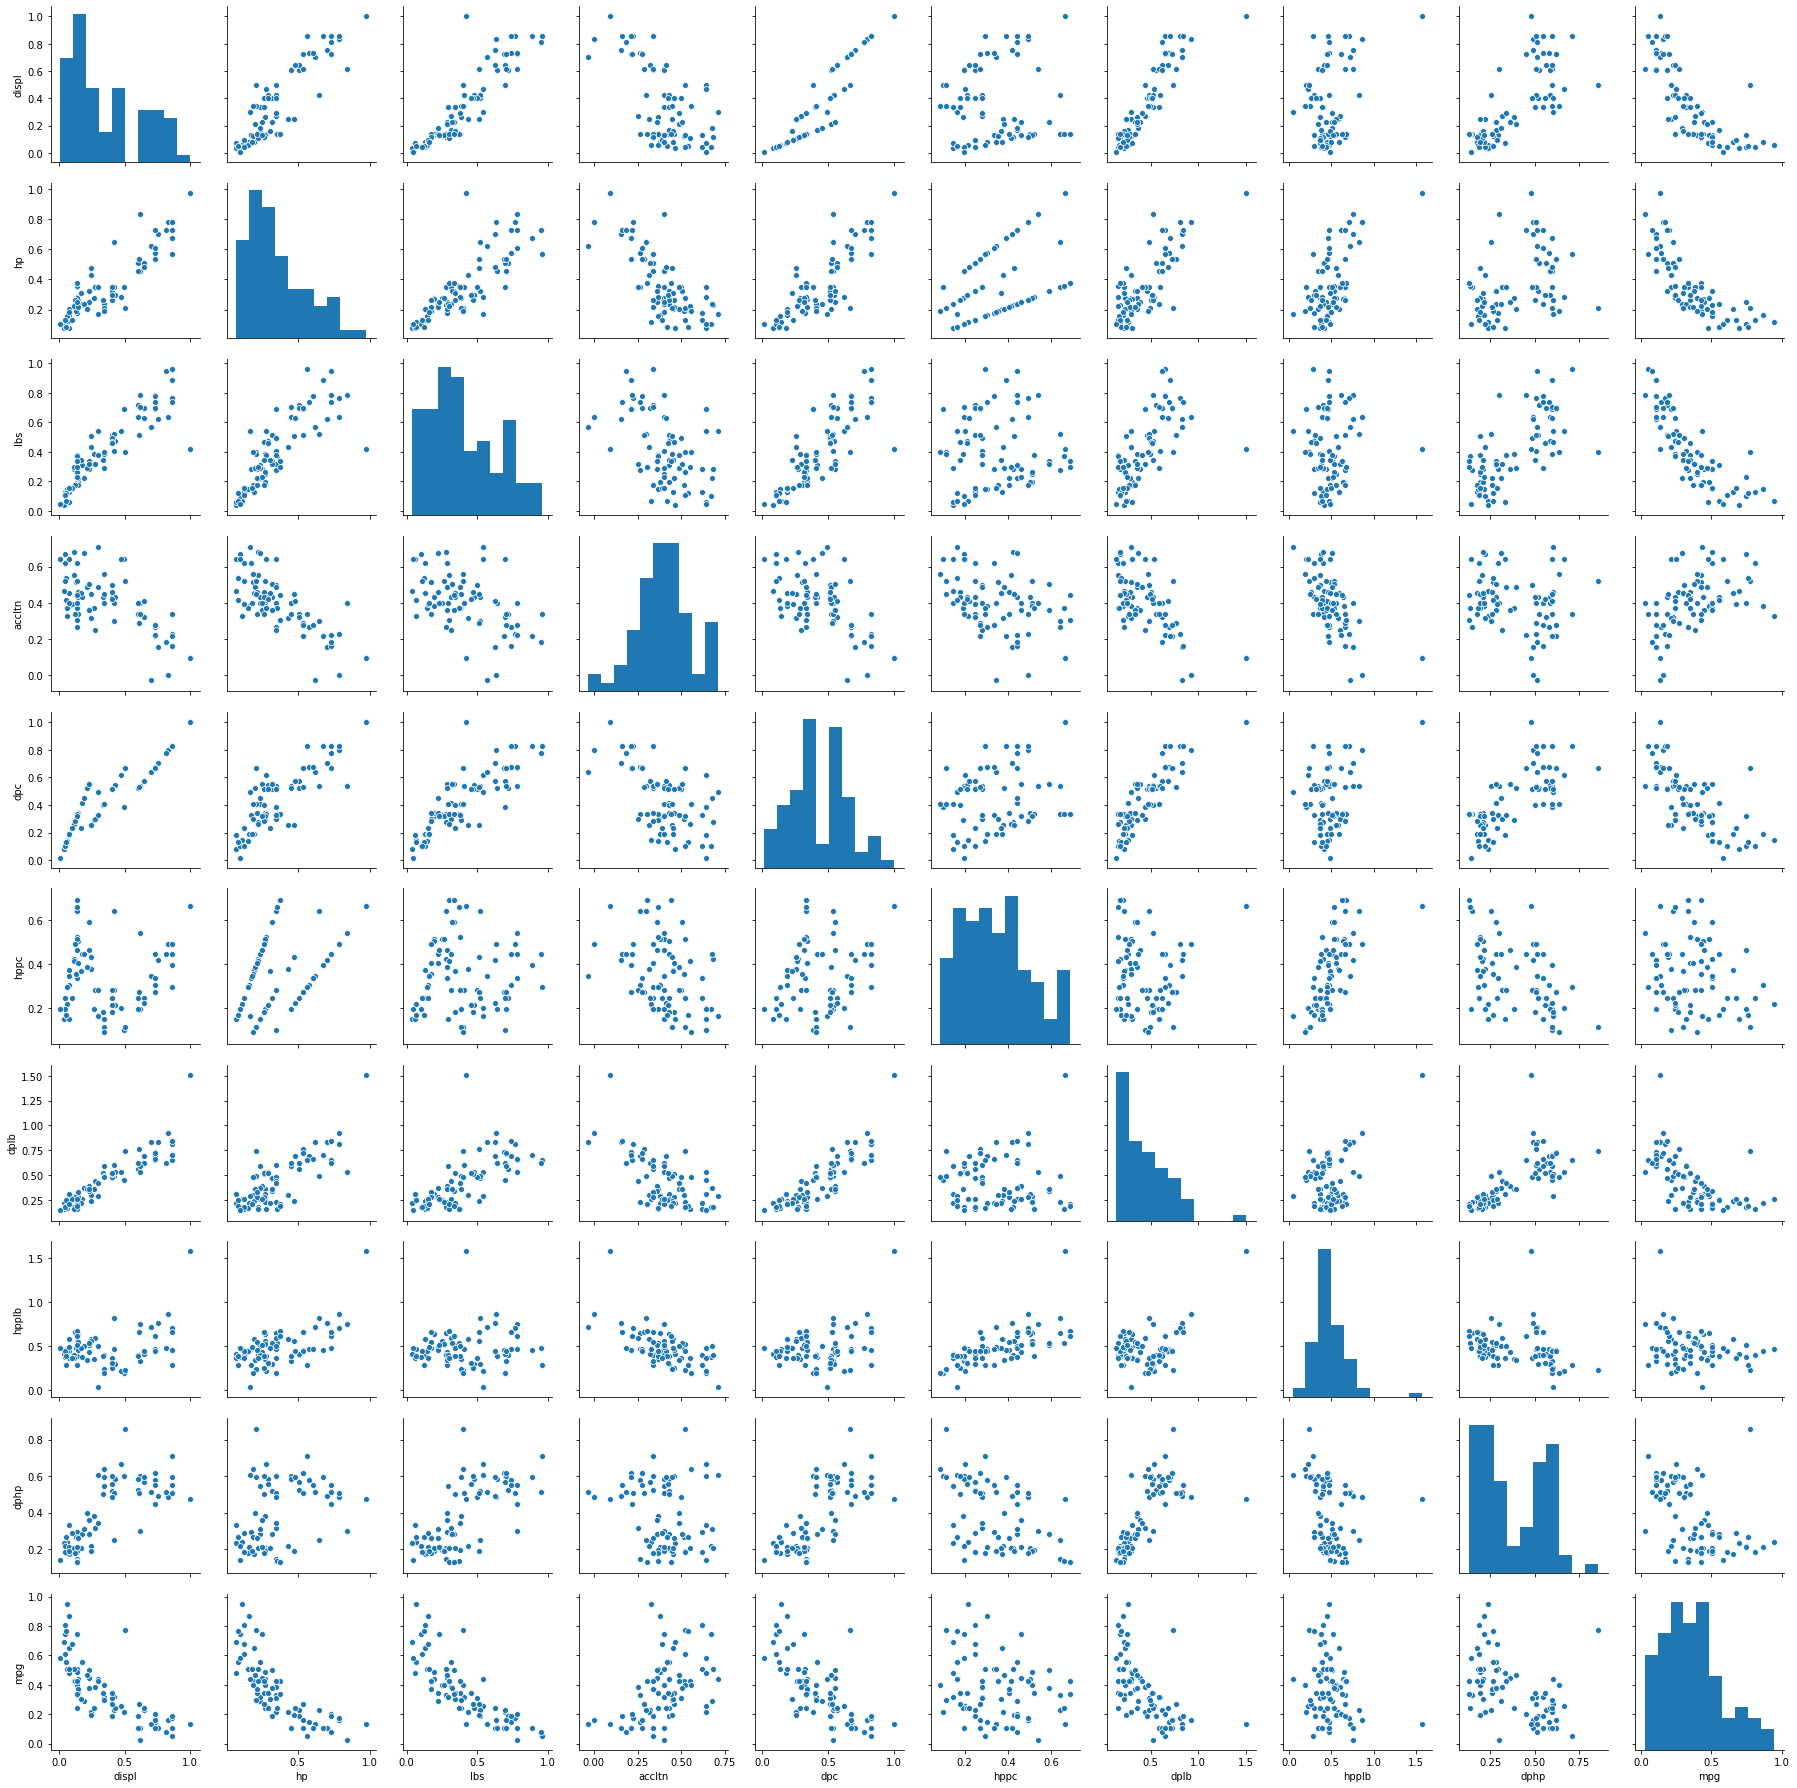

In [124]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df_scaled)
plt.show()

1. **Write a function,** 
`select_kbest_freg_unscaled()` 
**that takes X_train, y_train and k as input (X_train and y_train should not be scaled!) and returns a list of the top k features.**

In [125]:
from sklearn.feature_selection import SelectKBest, f_regression 

In [133]:
def select_kbest_freg_unscaled(X_train, y_train, k=2):
    f_selector = SelectKBest(f_regression, k=k)
    f_selector.fit(X_train, y_train)
    f_support = f_selector.get_support()
    f_feature = X_train.loc[:,f_support].columns.tolist()
    return f_feature, f_selector

In [169]:
f_feature, f_selector = select_kbest_freg_unscaled(X_train, y_train, 4)
X_scores = (pd.DataFrame(
    list(
        zip(X_train.columns, f_selector.scores_)
    ), 
    columns=['variable', 'f_score'])
                   .sort_values(by=['f_score'], axis=0, ascending=False))
print(str(len(f_feature)), 'selected features')
print(f_feature)
X_scores

4 selected features
['displ', 'hp', 'lbs', 'dpc']


,variable,f_score
2,lbs,720.782037
0,displ,621.032903
4,dpc,507.448696
1,hp,479.771724
6,dplb,376.790290
8,dphp,168.750286
3,accltn,62.675120
7,hpplb,25.211108
5,hppc,18.289909


2. **Write a function,** 
`select_kbest_freg_scaled()`
**that takes X_train, y_train (scaled) and k as input and returns a list of the top k features.**

In [170]:
def select_kbest_freg_scaled(X_train_scaled, y_train_scaled, k=2):
    f_feature_scaled, f_selector_scaled = select_kbest_freg_unscaled(X_train=X_train_scaled, y_train=y_train_scaled, k=k)
    return f_feature_scaled, f_selector_scaled

In [168]:
f_feature_scaled, f_selector_scaled = select_kbest_freg_scaled(X_train_scaled, y_train_scaled, 4)
X_scores_scaled = (pd.DataFrame(
    list(
        zip(X_train_scaled.columns, f_selector_scaled.scores_)
    ), 
    columns=['variable', 'f_score'])
                   .sort_values(by=['f_score'], axis=0, ascending=False))
                  
print(str(len(f_feature_scaled)), 'selected features')
print(f_feature_scaled)
X_scores_scaled

4 selected features
['displ', 'hp', 'lbs', 'dpc']


,variable,f_score
2,lbs,720.782037
0,displ,621.032903
4,dpc,507.448696
1,hp,479.771724
6,dplb,376.790290
8,dphp,168.750286
3,accltn,62.675120
7,hpplb,25.211108
5,hppc,18.289909


3. **Write a function,** 
`ols_backward_elimination()`
**that takes X_train and y_train (scaled) as input and returns selected features based on the ols backwards elimination method.**

In [171]:
import statsmodels.api as sm

In [193]:
def get_fit_summary(y_train_scaled, X_train_scaled):
    # create the OLS object:
    ols_model = sm.OLS(y_train_scaled, X_train_scaled)
    # fit the model:
    fit = ols_model.fit()
    # summarize:
    return fit.summary()

In [194]:
get_fit_summary(y_train_scaled, X_train_scaled)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              348.9
Date:                Tue, 15 Oct 2019   Prob (F-statistic):                   1.63e-154
Time:                        16:19:19   Log-Likelihood:                          192.25
No. Observations:                 313   AIC:                                     -366.5
Df Residuals:                     304   BIC:                                     -332.8
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
displ          0.0076      0.348      0.022      0.983      -0.676       0.692
hp            -0.4113      0.400     -1.028      0.305      -1.199       0.376
lbs           -0.2618      0.232     -1.127      0.261      -0.719       0.195
accltn         0.3461      0.070      4.923      0.000       0.208       0.484
dpc            0.6042      0.217      2.790      0.006       0.178       1.030
hppc          -0.6979      0.215     -3.240      0.001      -1.122      -0.274
dplb          -1.5151      0.371     -4.086      0.000      -2.245      -0.786
hpplb          1.5839      0.218      7.256      0.000       1.154       2.013
dphp           0.9555      0.259      3.687      0.000       0.446       1.466
==============================================================================
Omnibus:                        6.650   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                7.887
Skew:                           0.206   Prob(JB):                       0.0194
Kurtosis:                       3.660   Cond. No.                         82.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
def ols_backward_elimination(X_train_scaled, y_train_scaled):
    cols = list(X_train_scaled.columns)
    cols_removed = []
    removed_pvals = []
    pmax = 1
    while (len(cols)>0):
        p= []
        X_1 = X_train[cols]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y_train_scaled,X_1).fit()
        p = pd.Series(model.pvalues.values[1:],index = cols)
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax>0.05):
            cols_removed.append(feature_with_p_max)
            removed_pvals.append(pmax)
            cols.remove(feature_with_p_max)
        else:
            break
            
    selected_features_BE = cols
    removed_features_BE = cols_removed
    removed_pvals_BE = removed_pvals
    return selected_features_BE, removed_features_BE, removed_pvals_BE

In [198]:
selected_features_BE, removed_features_BE, removed_pvals_BE = ols_backward_elimination(X_train_scaled, y_train_scaled)
print(selected_features_BE)
#print(removed_features_BE)
#print(removed_pvals_BE)
removals = list(zip(removed_features_BE, removed_pvals_BE))
for feature in removals:
    print(f'Feature removed: {feature[0]}; p_value = {feature[1]:.4f}')


['displ', 'lbs', 'accltn', 'dpc', 'hppc', 'dplb', 'dphp']
['hp', 'hpplb']
[0.2068773574175386, 0.4128703221769311]
Feature removed: hp; p_value = 0.2069
Feature removed: hpplb; p_value = 0.4129


4. **Write a function,** 
`lasso_cv_coef()` 
**that takes X_train and y_train as input and returns the coefficients for each feature, along with a plot of the features and their weights.**

In [7]:
def lasso_cv_coef(X_train, y_train):
    pass

5. **Write 3 functions ...**

   - **The first computes the number of optimum features (n) using rfe**

   - **The second takes n as input and returns the top n features**

   - **The third takes the list of the top n features as input and returns a new X_train and X_test dataframe with those top features,** 
   `recursive_feature_elimination()` 
   **that computes the optimum number of features (n) and returns the top n features.**